# Example: REV analysis for Euler density.

This example demonstrates how to perform REV analysis for Euler density (Euler number divided by the domain volume).  The Euler density here is calculated using the topological properties of considered voxel domain as in Vogel, H. J., Weller, U., & Schlüter, S. (2010). Quantification of soil structure based on Minkowski functions. Computers & Geosciences, 36(10), 1236-1245. 

In [1]:
from revanalyzer import REVAnalyzer
from revanalyzer.metrics import EulerDensityI

[15:07:18] ERROR    PARDISO solver not installed, run `pip install           ]8;id=1730981238.5721607-103598;file:///home/azubov/miniconda3/lib/python3.9/site-packages/openpnm/utils/_workspace.py\_workspace.py]8;;\:56
                    pypardiso`. Otherwise, simulations will be slow. Apple M                 
                    chips not supported.

In [2]:
#initialization

image = 'ceramic300' #binary file of 'uint8' type representing 3D image.
size = (300, 300, 300) #size of image in x, y and z directions
n_steps = 6 # number of subsamples selection steps
sREV_max_step = 4 #maximal step for which sREV analysis is performed.
datadir = 'data' # path to folder containing image, default: 'data'
outputdir = 'output' # path to outputfolder containig image, default: 'output'
n_threads = 32 #number of threads, default: 1

metric = EulerDensityI(n_threads = n_threads)
analyzer = REVAnalyzer(metric = metric, image = image, size = size, n_steps = n_steps, sREV_max_step = sREV_max_step,
                       datadir = datadir, outputdir = outputdir)

In [3]:
#generate metric data for all the subsamples
analyzer.generate()

In [4]:
#fix thresholds and analyze generated data
analyzer.analyze(dREV_threshold = 0.2, sREV_threshold = 0.2)

In [5]:
#get mean, std and normed std values for different cut sizes
print(analyzer.metric_mean)
print(analyzer.metric_std)
print(analyzer.metric_normed_std)

#get sREV and dREV sizes
print(analyzer.sREV_size_1)
print(analyzer.dREV_size_1)
print(analyzer.dREV_size_2)


{1: -3.555555555555556e-05, 2: -8.555555555555556e-05, 3: -9.303703703703704e-05, 4: -9.768055555555555e-05, 5: -9.9392e-05, 6: -0.00010092592592592593}
{1: 3.180185567999701e-05, 2: 1.5656813292274256e-05, 3: 1.11705406543002e-05, 4: 6.530407271817161e-06}
{1: 0.8944271909999157, 2: 0.183001713805803, 3: 0.12006552454860885, 4: 0.06685473106367633}
100
100
100


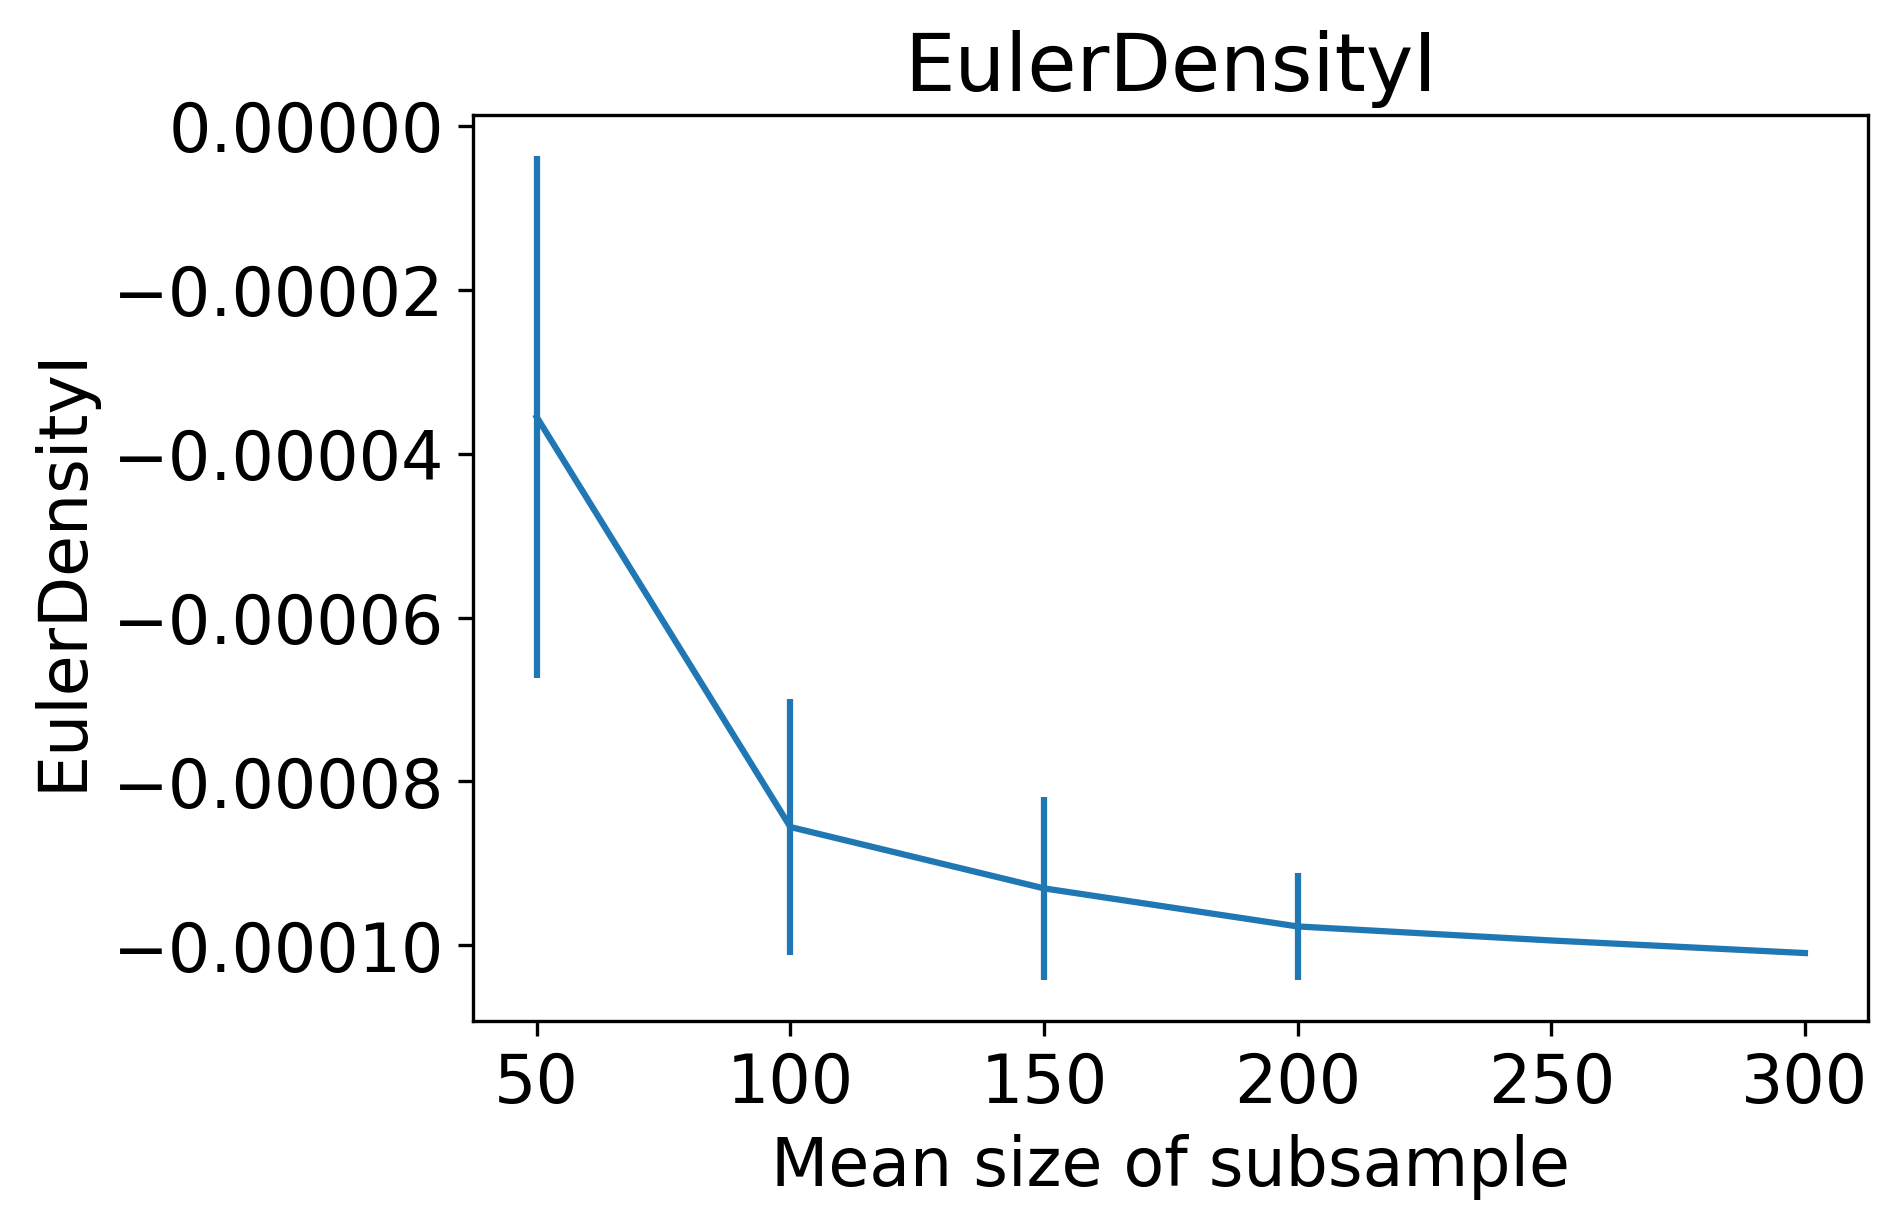

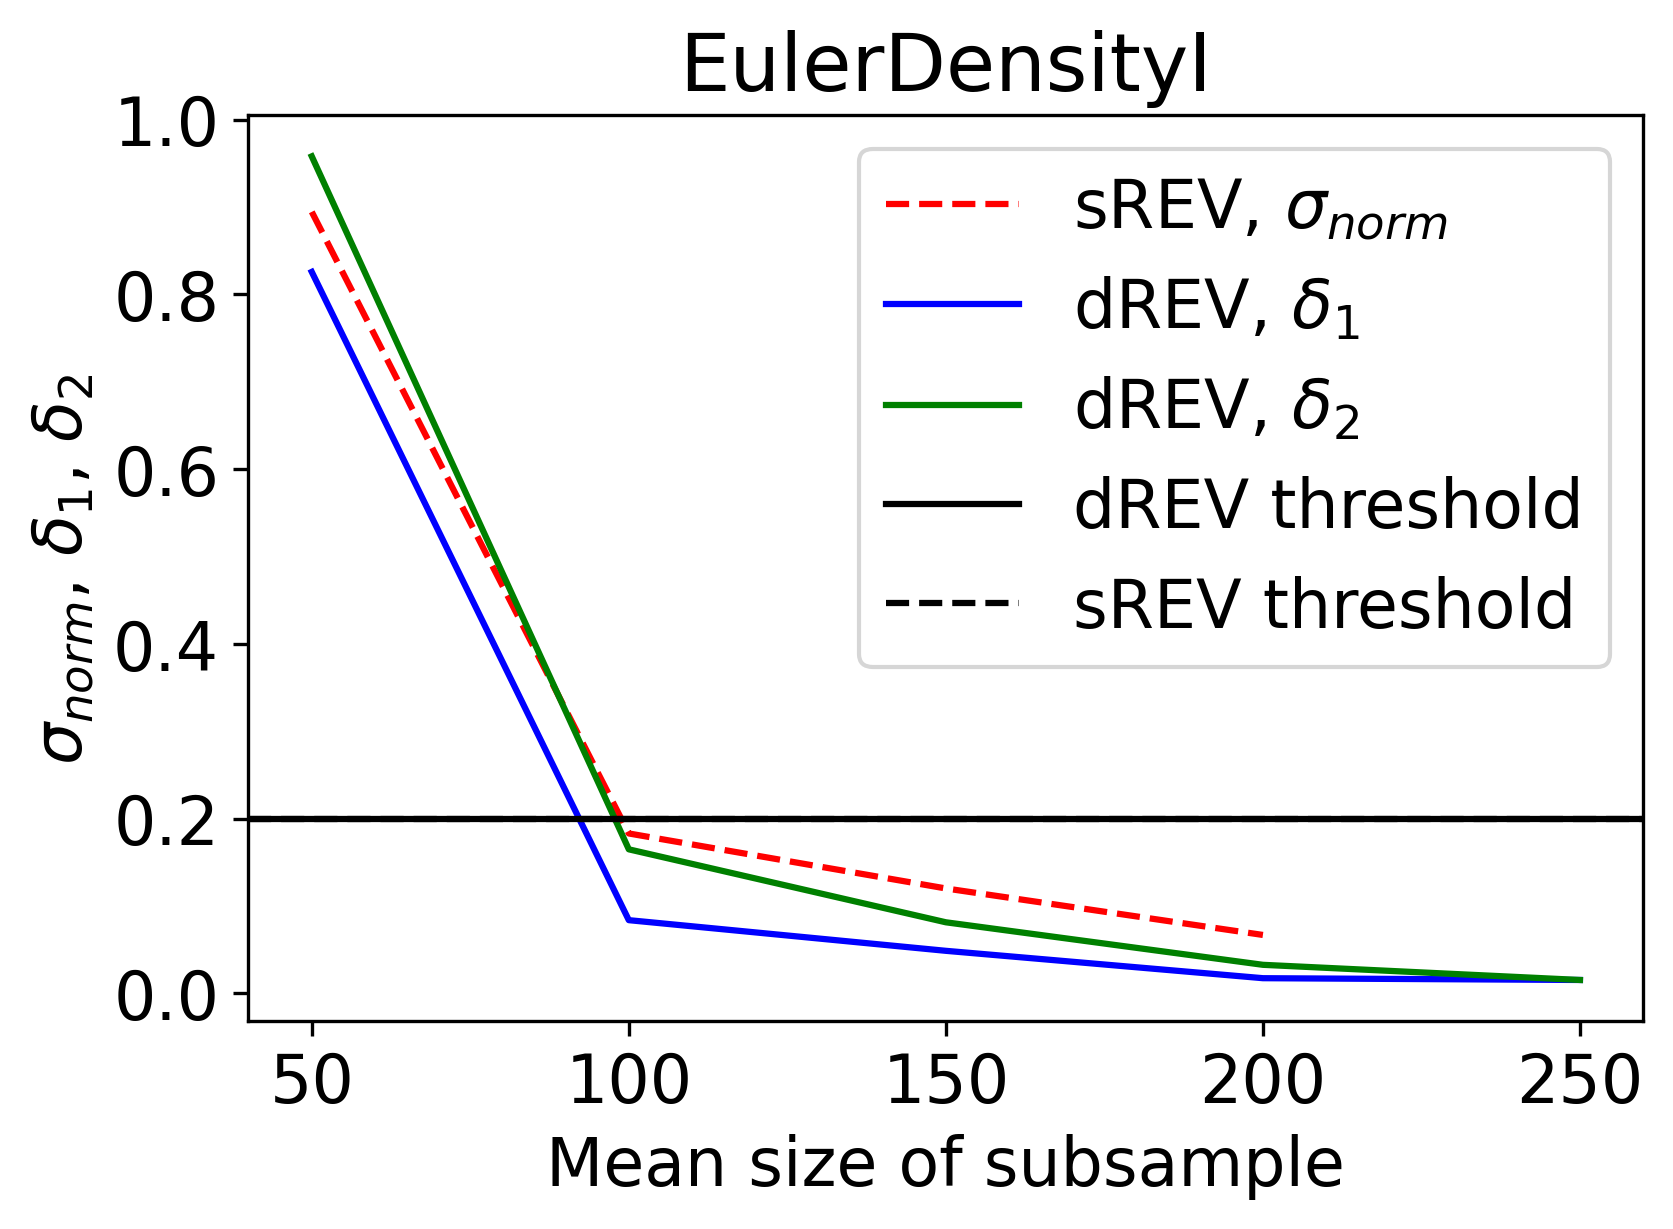

In [6]:
analyzer.show_results()